In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
import pandas as pd
from tqdm import tqdm 

chunk_iter = pd.read_csv('../data/raw_analyst_ratings.csv', 
                         chunksize=50000,
                         parse_dates=['date'])

# Initialize results storage
publisher_counts = pd.Series(dtype=int)
headline_lengths = []
date_counts = pd.Series(dtype=int)


for chunk in tqdm(chunk_iter, desc="Processing chunks"):
    # Make sure 'date' is datetime
    chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')

    # Publisher analysis
    pub_counts = chunk['publisher'].value_counts()
    publisher_counts = publisher_counts.add(pub_counts, fill_value=0)

    # Headline length analysis
    chunk['headline_length'] = chunk['headline'].str.len()
    headline_lengths.append(chunk['headline_length'])

    # Date frequency
    daily = chunk['date'].dt.date.value_counts()
    date_counts = date_counts.add(daily, fill_value=0)

Processing chunks: 0it [00:00, ?it/s]

Processing chunks: 29it [00:57,  1.99s/it]


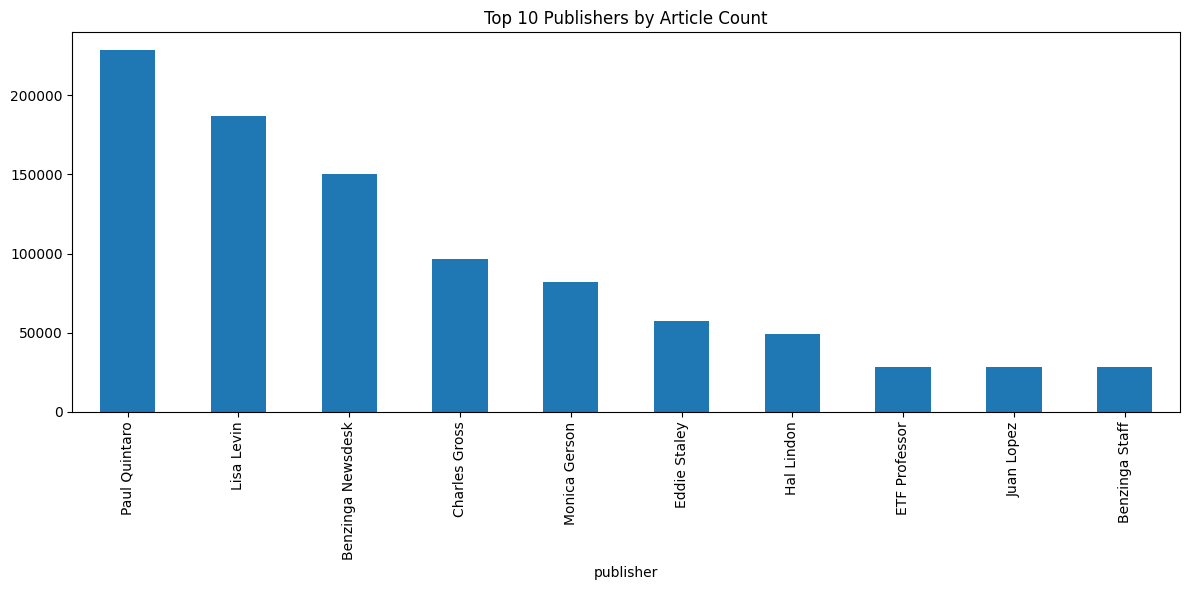

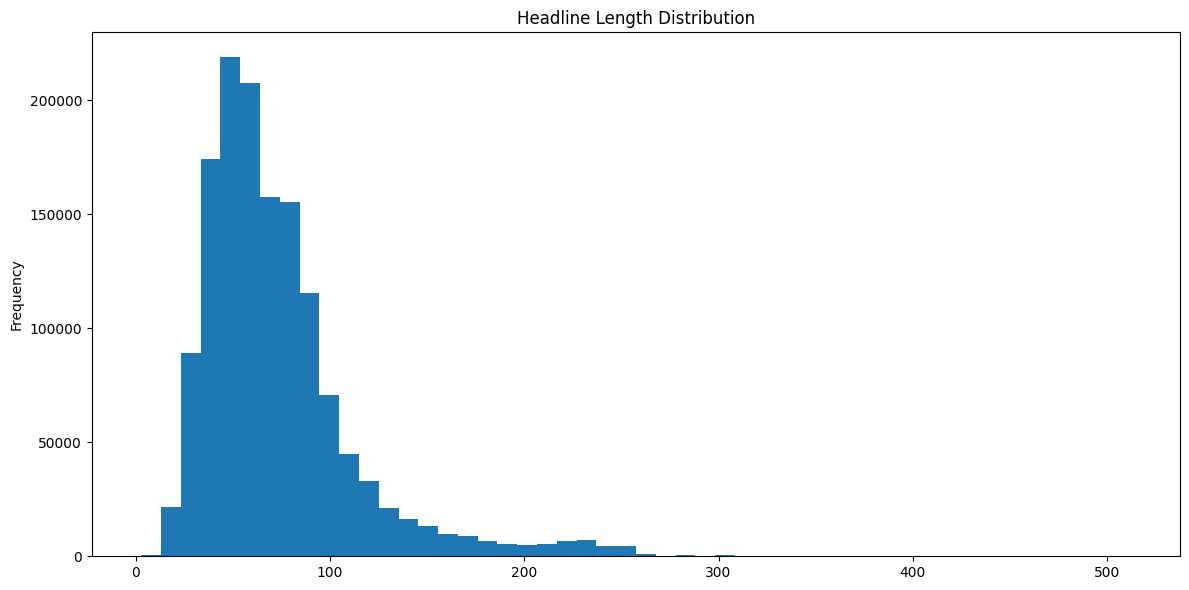

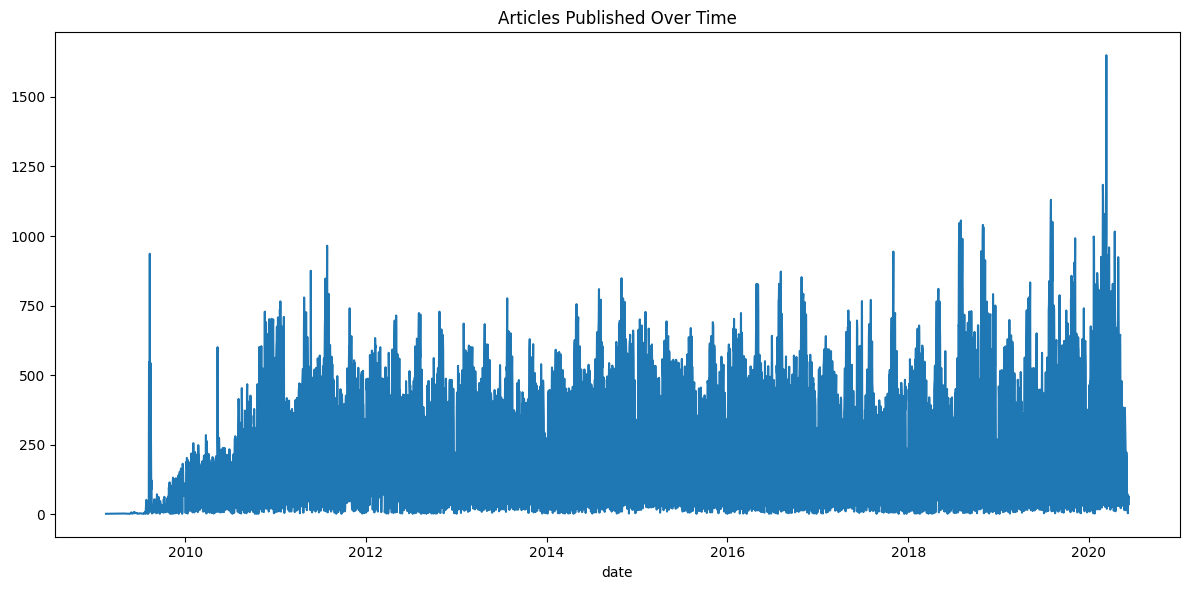

In [15]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the plots folder exists
os.makedirs('../plots', exist_ok=True)

# Combine headline lengths only if it's a list
if isinstance(headline_lengths, list):
    headline_lengths = pd.concat(headline_lengths)

# Plot 1: Top 10 Publishers
plt.figure(figsize=(12, 6))
publisher_counts.nlargest(10).plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.tight_layout()
plt.savefig('../plots/top_publishers.png')

# Plot 2: Headline Length Distribution
plt.figure(figsize=(12, 6))
headline_lengths.plot(kind='hist', bins=50)
plt.title('Headline Length Distribution')
plt.tight_layout()
plt.savefig('../plots/headline_lengths.png')

# Plot 3: Articles Over Time
plt.figure(figsize=(12, 6))
date_counts.sort_index().plot()
plt.title('Articles Published Over Time')
plt.tight_layout()
plt.savefig('../plots/articles_over_time.png')
